[Youtube Tutorial by Bhavesh Bhatt](https://www.youtube.com/watch?v=KKS9m2XChig&t=7s)

In [6]:
## Importing libraries
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from matplotlib.colors import ListedColormap

from mlxtend.plotting import plot_decision_regions

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons


In [2]:
# Setting parameters
zero_one_colourmap = ListedColormap(('red', 'green'))
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 14, 7
np.random.seed(800)

In [3]:
# dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

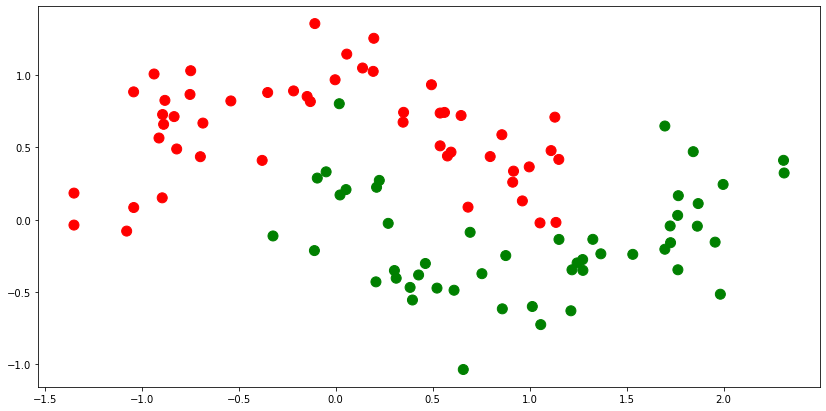

In [4]:
plt.scatter(X[:,0], X[:,1], 
            c=y, s=100, 
            cmap = zero_one_colourmap)
plt.show()

In [7]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

### Model without early stopping

In [15]:
# Defining the architecture of the model
model = Sequential()

model.add(Dense(128, input_dim = 2, activation='relu')) # first hidden layer
model.add(Dense(1, activation='sigmoid')) # using softmax, we won't get any decision boundary on plot

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
model_fit1 = model.fit(X_train, y_train,
                       validation_data = (X_test, y_test),
                       epochs = 4000, verbose=0)

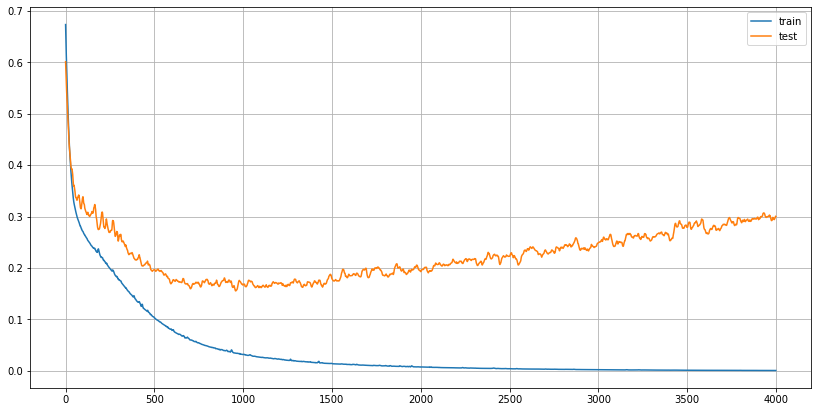

In [17]:
# plotting the model stats
plt.plot(model_fit1.history['loss'], label = 'train')
plt.plot(model_fit1.history['val_loss'], label = 'test')
plt.grid()
plt.legend()
plt.show()

#### Observations: after a certain number of epochs, the model clearly started to overfit (as training error started to reduce but test error kept on increasing)

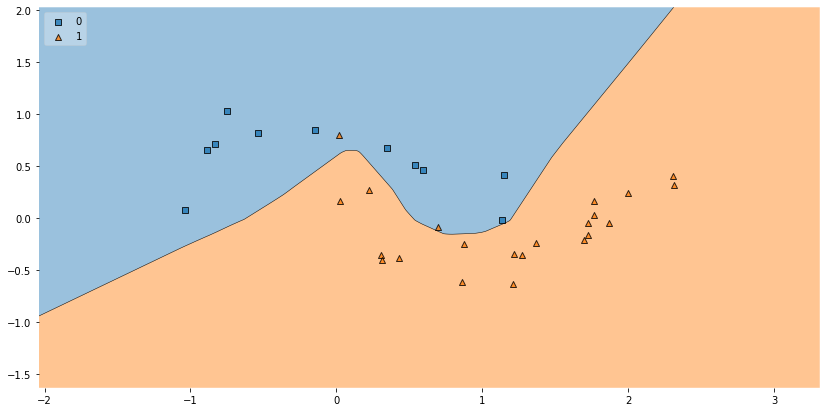

In [22]:
# plotting the decision boundary
# The numpy. ravel() functions returns contiguous flattened array(1D array with all the input-array elements and with the same type as it)
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

### Model with Early Stopping

In [27]:
# Defining the model architecture

model_2 = Sequential()

model_2.add(Dense(128, input_dim=2, activation='relu'))
model_2.add(Dense(1, activation = 'sigmoid'))

model_2.compile(loss='binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [ ]:
model_2_fit = model_2.fit(X_train, y_train,
                          validation_data = (X_test, y_test),
                          epochs = 4000,
                          callbacks = EarlyStopping(monitor='val_loss', 
                                                    patience=10))
# to avoid overfitting
# patience --> Number of epochs with no improvement after which training will be stopped.

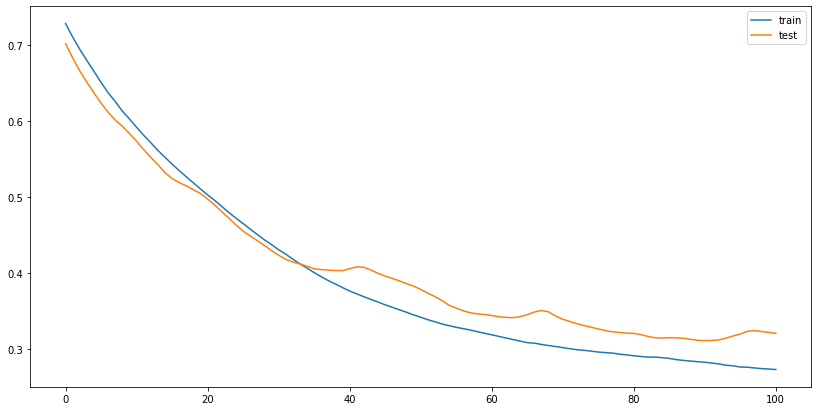

In [29]:
plt.plot(model_2_fit.history['loss'], label='train')
plt.plot(model_2_fit.history['val_loss'], label='test')
plt.legend()
plt.show()

#### Observations: we can clearly see a reduction in both training and test errors with number of epochs

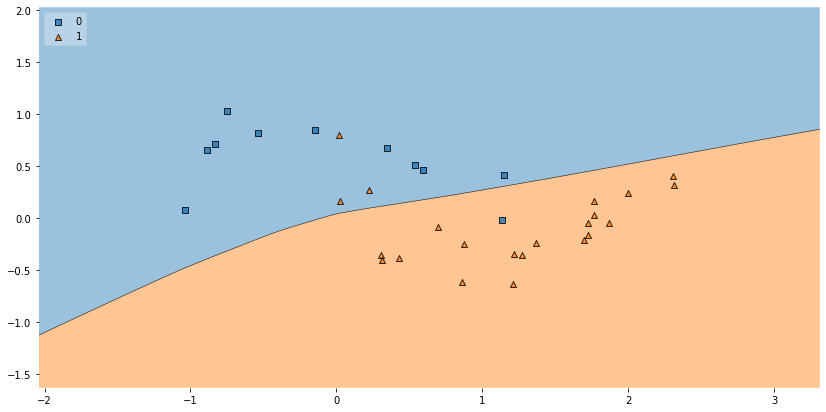

In [30]:
plot_decision_regions(X_test, y_test.ravel(), clf = model_2, legend=2)
plt.show()